# Function Testing Notebook - Joseph

This notebook is meant to test external-facing functions to ensure they are working as expected.

A dedicated test_all_functions.py with unit testing might be better, but this is a good benchmark

In [27]:
import sys
from pathlib import Path
import time
import tempfile

import numpy as np
import matplotlib.pyplot as plt

packageroot = Path('../../').resolve()
print(packageroot)
sys.path.append(str(packageroot))


/mnt/isilon/marsh_single_unit/PythonEEG


In [28]:
from pythoneeg import core
from pythoneeg import visualization
# from pythoneeg import constants

print(core.__all__)
# print(visualization.__all__)
# print(dir(constants))

['DDFBinaryMetadata', 'LongRecordingOrganizer', 'convert_ddfcolbin_to_ddfrowbin', 'convert_ddfrowbin_to_si', 'convert_units_to_multiplier', 'convert_colpath_to_rowpath', 'filepath_to_index', 'is_day', 'LongRecordingAnalyzer', 'MountainSortOrganizer']


In [29]:
tempfile.tempdir = '/scr1/users/dongjp'

In [30]:
tmpmet = core.DDFBinaryMetadata(r"/mnt/isilon/marsh_single_unit/PythonEEG Data Bins/A5 WT 12_12-2023/Cage 1 A5 -1_Meta.csv")
print(tmpmet.dt_end.ctime())
display(tmpmet.channel_names)

Tue Dec 12 12:57:00 2023


['Intan Input (1)/PortB L Aud Ctx',
 'Intan Input (1)/PortB L Vis Ctx',
 'Intan Input (1)/PortB L Hipp',
 'Intan Input (1)/PortB L Barrel',
 'Intan Input (1)/PortB L Motor',
 'Intan Input (1)/PortB R Motor',
 'Intan Input (1)/PortB R Barrel',
 'Intan Input (1)/PortB R Hipp',
 'Intan Input (1)/PortB R Vis Ctx',
 'Intan Input (1)/PortB R Aud Ctx']

In [31]:
data_folder = Path('./test-data').resolve()
lrec = core.LongRecordingOrganizer(base_folder_path= data_folder / 'A5 WT 12_12-2023',
                                    truncate=3)
lrec.convert_colbins_to_rowbins(overwrite=False)
lrec.convert_rowbins_to_rec()

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/core/core.py:170: UserWarning: truncate = True. Only the first 3 files of each animal will be used
  warnings.warn(f"truncate = True. Only the first {self.n_truncate} files of each animal will be used")
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/core/core.py:257: UserWarning: Row-major binary files already exist! Skipping existing files
  warnings.warn("Row-major binary files already exist! Skipping existing files")


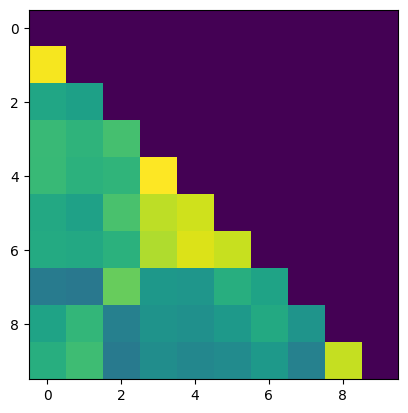

In [32]:
lan = core.LongRecordingAnalyzer(lrec, 10)

lan.setup_njobs()
mags = []
phases = []

for i in range(lan.n_fragments // 100):
    if i == 20:
        break
    t = time.process_time()

    # lan.compute_nspike(i)
    # csd = lan.compute_csd(i)
    # plt.imshow(csd['alpha'])

    coh = lan.compute_cohere(i)
    plt.imshow(coh['gamma'])

    pcorr = lan.compute_pcorr(i)
    plt.imshow(pcorr)

    # cacoh = lan.compute_cacoh(i)
    # plt.imshow(cacoh[0])

    # cacoh = lan.compute_cacoh(i, freq_res=1, indices=([[0,1,2,3]], [[4,5,6,7]]))
    # mags.append(cacoh[0])
    # phases.append(cacoh[1])


    # fig, ax = plt.subplots(1, 2, figsize=(6, 3))
    # ax[0].imshow(corr)
    # ax[1].imshow(pcorr)
    # plt.show()

# _, ax = plt.subplots(1, 2, figsize=(8, 2), sharex=True)
# mags = np.stack(mags, axis=-1).mean(axis=-1)
# phases = np.stack(phases, axis=-1).mean(axis=-1)
# ax[0].semilogx(cacoh[2], mags.transpose())
# ax[1].semilogx(cacoh[2], phases.transpose(), c='C1')
# ax[0].set_title("Magnitude")
# ax[1].set_title("Phase")
# plt.show()


In [33]:
Path('./test-wars/A5').resolve()

PosixPath('/mnt/isilon/marsh_single_unit/PythonEEG/notebooks/tests/test-wars/A5')

In [34]:
# %%script true
# animal_ids = ['A5', 'A10', 'F22', 'G25']
animal_ids = ['A10']
base_folder = Path('./test-data').resolve()
for animal_id in animal_ids:
    ao = visualization.AnimalOrganizer(base_folder, animal_id, mode="concat", assume_from_number=True, truncate=5)
    ao.convert_colbins_to_rowbins(overwrite=False)
    ao.convert_rowbins_to_rec()

    war = ao.compute_windowed_analysis(['all'], exclude=['nspike', 'wavetemp'], multiprocess_mode='serial')
    war.to_pickle_and_json(Path(f'./test-wars/{animal_id}').resolve())
# result = ao.compute_windowed_analysis(['cohere', 'pcorr']) # nspike needs work
# result = ao.compute_windowed_analysis(['nspike', 'wavetemp']) # nspike needs work
# result = ao.compute_windowed_analysis(['psd', 'cohere'], welch_bin_t=2, magnitude=False)

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/core/core.py:170: UserWarning: truncate = True. Only the first 5 files of each animal will be used
  warnings.warn(f"truncate = True. Only the first {self.n_truncate} files of each animal will be used")
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/core/core.py:257: UserWarning: Row-major binary files already exist! Skipping existing files
  warnings.warn("Row-major binary files already exist! Skipping existing files")


Processing serially


Processing rows:  97%|█████████▋| 30/31 [00:03<00:00,  9.70it/s]/mnt/isilon/marsh_single_unit/PythonEEG/.venv-linux-3.10/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1000 is greater than input length  = 360, using nperseg = 360
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/mnt/isilon/marsh_single_unit/PythonEEG/.venv-linux-3.10/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1000 is greater than input length  = 360, using nperseg = 360
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/mnt/isilon/marsh_single_unit/PythonEEG/.venv-linux-3.10/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1000 is greater than input length  = 360, using nperseg = 360
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/mnt/isilon/marsh_single_unit/PythonEEG/.venv-linux-3.10/lib/python3.10/site-packages/scipy/signal/_spect

Channel names: 	['Intan Input (1)/PortC C-009', 'Intan Input (1)/PortC C-010', 'Intan Input (1)/PortC C-012', 'Intan Input (1)/PortC C-014', 'Intan Input (1)/PortC C-015', 'Intan Input (1)/PortC C-016', 'Intan Input (1)/PortC C-017', 'Intan Input (1)/PortC C-019', 'Intan Input (1)/PortC C-021', 'Intan Input (1)/PortC C-022']
Channel abbreviations: 	['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']



/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/results.py:85: UserWarning: Intan Input (1)/PortC C-009 does not match name aliases. Assuming alias from number in channel name.
  warnings.warn(f"{channel_name} does not match name aliases. Assuming alias from number in channel name.")
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/results.py:85: UserWarning: Intan Input (1)/PortC C-010 does not match name aliases. Assuming alias from number in channel name.
  warnings.warn(f"{channel_name} does not match name aliases. Assuming alias from number in channel name.")
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/results.py:85: UserWarning: Intan Input (1)/PortC C-012 does not match name aliases. Assuming alias from number in channel name.
  warnings.warn(f"{channel_name} does not match name aliases. Assuming alias from number in channel name.")
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/results.py:85: UserWarning: Inta

In [35]:
war = visualization.WindowAnalysisResult.from_pickle_and_json(Path('./test-wars/A5').resolve())

Channel names: 	['Intan Input (1)/PortB L Aud Ctx', 'Intan Input (1)/PortB L Vis Ctx', 'Intan Input (1)/PortB L Hipp', 'Intan Input (1)/PortB L Barrel', 'Intan Input (1)/PortB L Motor', 'Intan Input (1)/PortB R Motor', 'Intan Input (1)/PortB R Barrel', 'Intan Input (1)/PortB R Hipp', 'Intan Input (1)/PortB R Vis Ctx', 'Intan Input (1)/PortB R Aud Ctx']
Channel abbreviations: 	['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']


In [36]:
war.get_result(['all'], allow_missing=True)

,index,animalday,animal,day,genotype,duration,endfile,timestamp,isday,rms,ampvar,psd,psdtotal,psdband,psdslope,cohere,pcorr,nspike,wavetemp
0,0,A5 WT Dec-12-2023,A5,2023-12-12,WT,4.0,NaN,2023-12-12 12:49:21.640,True,"[340.2445, 323.54434, 392.14343, 287.55704, 34...","[108016.54, 101200.21, 152518.36, 81025.01, 11...","([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...","[5598.1367, 5873.6416, 23756.754, 6110.4326, 7...","{'delta': [4002.5454, 4266.2, 14007.733, 4394....","[(-2.237275177854065, 4.014240820216531), (-2....","{'delta': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",NaN,NaN
1,1,A5 WT Dec-12-2023,A5,2023-12-12,WT,4.0,NaN,2023-12-12 12:49:25.640,True,"[355.00095, 355.70462, 937.7705, 527.04816, 49...","[125480.39, 126022.64, 879195.4, 277070.97, 24...","([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...","[59956.93, 60779.113, 616261.5, 148432.03, 137...","{'delta': [20599.016, 21049.7, 163644.72, 5386...","[(-2.2064108014162693, 5.120284496512877), (-2...","{'delta': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",NaN,NaN
2,2,A5 WT Dec-12-2023,A5,2023-12-12,WT,4.0,NaN,2023-12-12 12:49:29.640,True,"[1552.6139, 1577.951, 2028.9061, 1685.8368, 16...","[2408394.8, 2485401.2, 4100196.5, 2829144.0, 2...","([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...","[2196752.0, 2250989.8, 3889262.0, 2655426.2, 2...","{'delta': [1736629.9, 1758100.4, 1267564.0, 16...","[(-2.628731214039885, 6.822229384055559), (-2....","{'delta': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",NaN,NaN
3,3,A5 WT Dec-12-2023,A5,2023-12-12,WT,4.0,NaN,2023-12-12 12:49:33.640,True,"[1229.3511, 1262.778, 1855.7942, 1281.3319, 13...","[1487385.4, 1563496.2, 3426400.8, 1611840.4, 1...","([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...","[1338901.0, 1464213.0, 3403545.2, 1487865.0, 1...","{'delta': [1040481.06, 1139599.5, 1615709.1, 8...","[(-2.718990212523333, 6.665359232761853), (-2....","{'delta': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",NaN,NaN
4,4,A5 WT Dec-12-2023,A5,2023-12-12,WT,4.0,NaN,2023-12-12 12:49:37.640,True,"[2346.3865, 2393.4958, 2475.471, 2327.7273, 23...","[5505482.5, 5728515.0, 6120305.0, 5418287.0, 5...","([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...","[4481087.0, 4524769.5, 4864084.0, 4379262.5, 4...","{'delta': [2175370.5, 2165939.8, 1742521.0, 19...","[(-1.4094430047841326, 6.214892562765051), (-1...","{'delta': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,1912,A5 WT Dec-12-2023,A5,2023-12-12,WT,4.0,NaN,2023-12-12 14:56:49.640,True,"[82.22915, 71.0848, 91.09576, 74.256004, 86.87...","[6759.652, 5052.5903, 8297.957, 5509.209, 7547...","([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...","[6220.7456, 4802.822, 7542.578, 4709.9077, 692...","{'delta': [4639.47, 2735.3027, 3395.65, 3283.4...","[(-1.7721226457786392, 3.516225383822045), (-1...","{'delta': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",NaN,NaN
1913,1913,A5 WT Dec-12-2023,A5,2023-12-12,WT,4.0,NaN,2023-12-12 14:56:53.640,True,"[78.78963, 72.363655, 103.91884, 84.31734, 92....","[6188.3574, 5235.637, 10792.171, 7109.039, 864...","([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...","[5720.8145, 4734.63, 9992.604, 6822.042, 7928....","{'delta': [2898.9675, 2614.5999, 3874.2605, 45...","[(-1.9632588570223861, 3.8691857754276353), (-...","{'delta': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",NaN,NaN
1914,1914,A5 WT Dec-12-2023,A5,2023-12-12,WT,4.0,NaN,2023-12-12 14:56:57.640,True,"[84.99855, 93.47591, 130.35475, 100.96558, 111...","[7224.152, 8727.532, 16963.68, 10191.423, 1241...","([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...","[6566.466, 7204.405, 14367.25

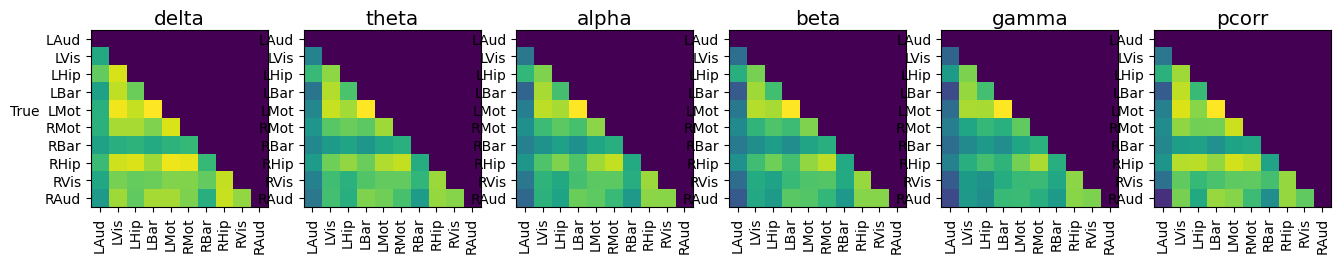

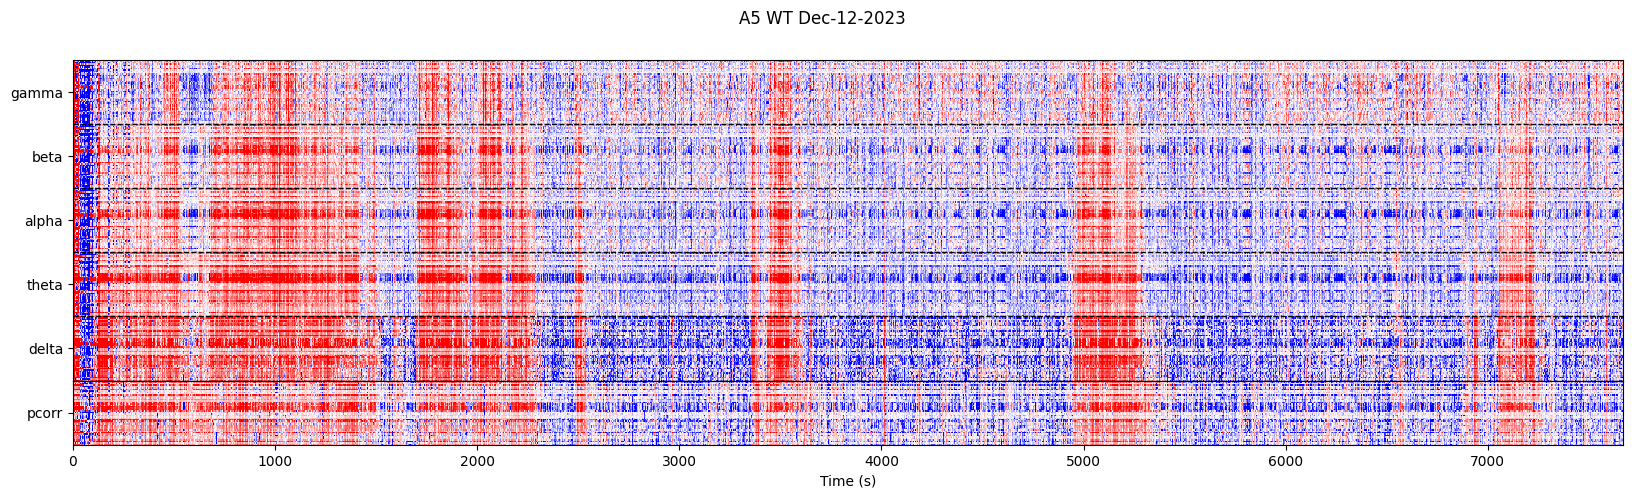

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/animal.py:331: RuntimeWarning: divide by zero encountered in log10
  ax[0, i].plot(freqs, 10**(b + m * np.log10(freqs)), c=f'C{j}', alpha=0.75)


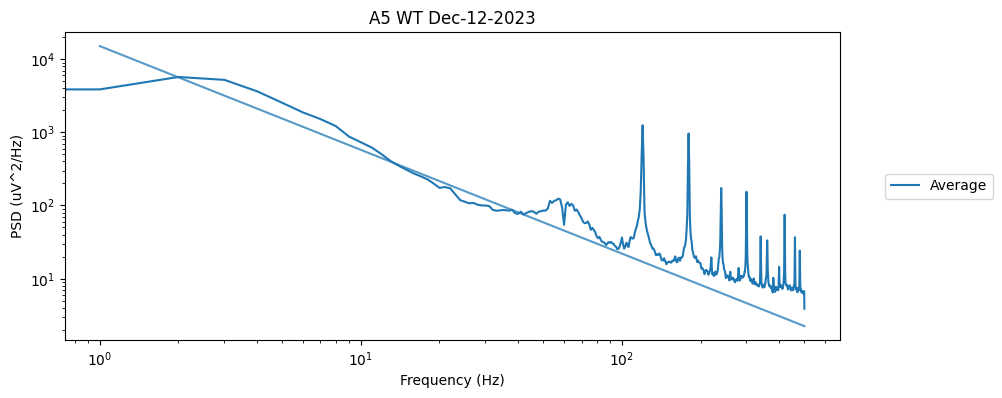

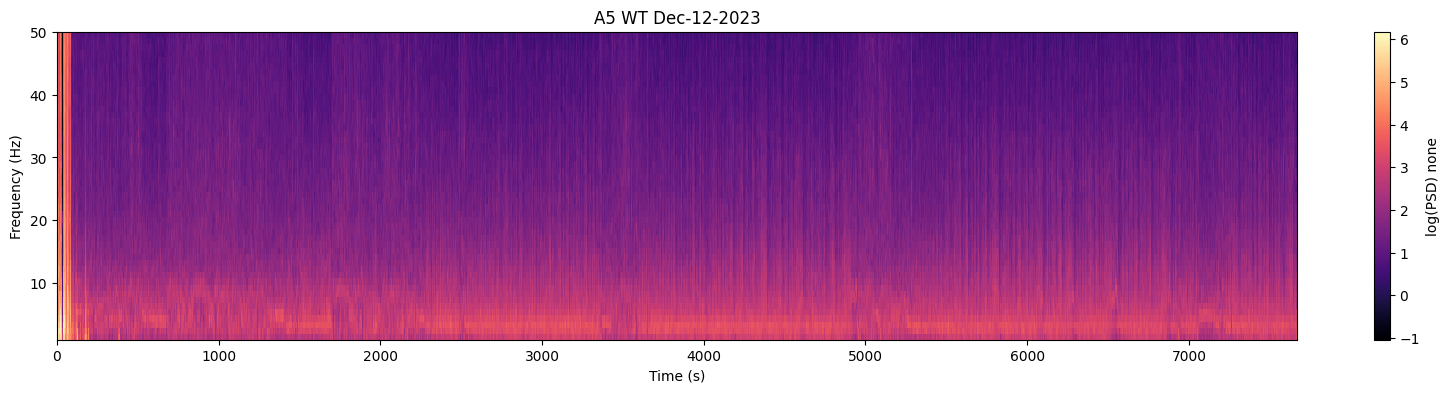

In [37]:
ap = visualization.AnimalPlotter(war)
ap.plot_coherecorr_matrix(['isday'], bands=None, figsize=(16,5), cmap='viridis')
# ap.plot_coherecorr_diff(['isday'], bands=None, figsize=(16,5))
# ap.plot_linear_temporal(figsize=(20, 5), score_type='z', lw=1, channels=[0, 1])
# ap.plot_linear_temporal(['isday'], figsize=(20, 5), score_type='z', lw=1, channels=[0, 1, 2, 3])

# ap.plot_coherecorr_spectral(['isday'], figsize=(20, 5), score_type='center')

ap.plot_coherecorr_spectral(figsize=(20, 5), score_type='center')
ap.plot_psd_histogram(figsize=(10, 4), avg_channels=True, plot_type='loglog')
ap.plot_psd_spectrogram(figsize=(20, 4), mode='none')

Channel names: 	['Intan Input (1)/PortB L Aud Ctx', 'Intan Input (1)/PortB L Vis Ctx', 'Intan Input (1)/PortB L Hipp', 'Intan Input (1)/PortB L Barrel', 'Intan Input (1)/PortB L Motor', 'Intan Input (1)/PortB R Motor', 'Intan Input (1)/PortB R Barrel', 'Intan Input (1)/PortB R Hipp', 'Intan Input (1)/PortB R Vis Ctx', 'Intan Input (1)/PortB R Aud Ctx']
Channel abbreviations: 	['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']
Channel names: 	['Intan Input (1)/PortC C-009', 'Intan Input (1)/PortC C-010', 'Intan Input (1)/PortC C-012', 'Intan Input (1)/PortC C-014', 'Intan Input (1)/PortC C-015', 'Intan Input (1)/PortC C-016', 'Intan Input (1)/PortC C-017', 'Intan Input (1)/PortC C-019', 'Intan Input (1)/PortC C-021', 'Intan Input (1)/PortC C-022']
Channel abbreviations: 	['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']
Channel names: 	['Intan Input (1)/PortD D-009', 'Intan Input (1)/PortD D-010', 'Intan Input (1)/PortD D-012'

/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/results.py:85: UserWarning: Intan Input (1)/PortC C-009 does not match name aliases. Assuming alias from number in channel name.
  warnings.warn(f"{channel_name} does not match name aliases. Assuming alias from number in channel name.")
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/results.py:85: UserWarning: Intan Input (1)/PortC C-010 does not match name aliases. Assuming alias from number in channel name.
  warnings.warn(f"{channel_name} does not match name aliases. Assuming alias from number in channel name.")
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/results.py:85: UserWarning: Intan Input (1)/PortC C-012 does not match name aliases. Assuming alias from number in channel name.
  warnings.warn(f"{channel_name} does not match name aliases. Assuming alias from number in channel name.")
/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/results.py:85: UserWarning: Intan

Channel names: 	['Intan Input (1)/PortC LAud ctexC-009', 'Intan Input (1)/PortC Lvis ctexC-010', 'Intan Input (1)/PortC L hippC-012', 'Intan Input (1)/PortC Lbarrel', 'Intan Input (1)/PortC L motor', 'Intan Input (1)/PortC R motor', 'Intan Input (1)/PortC R barrel', 'Intan Input (1)/PortC R hippoc', 'Intan Input (1)/PortC Rvis', 'Intan Input (1)/PortC R aud']
Channel abbreviations: 	['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']


/mnt/isilon/marsh_single_unit/PythonEEG/pythoneeg/visualization/plotting/experiment.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.all = pd.concat(df_all, axis=0, ignore_index=True)


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='animal', ylabel='rms'>,
 None)

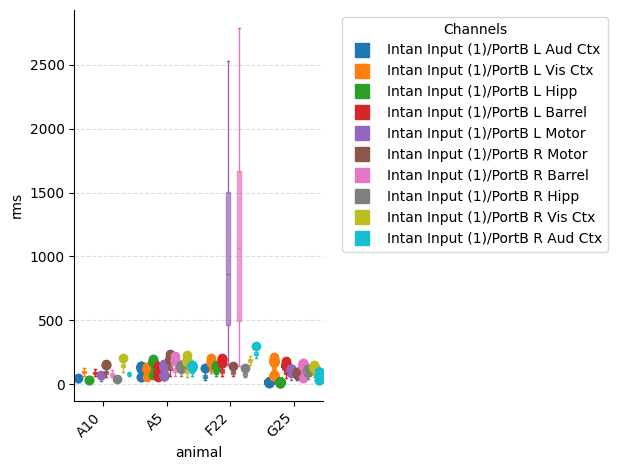

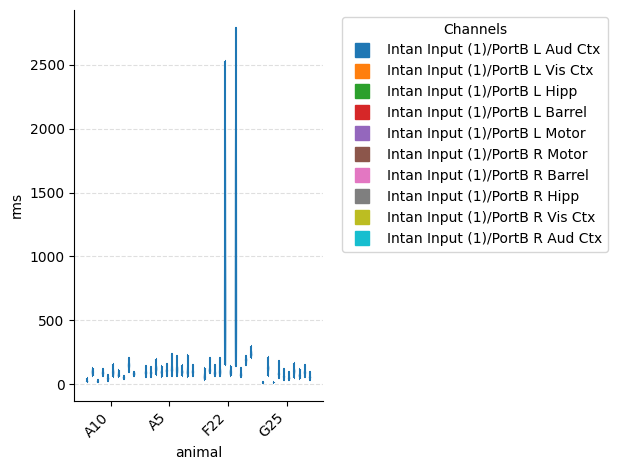

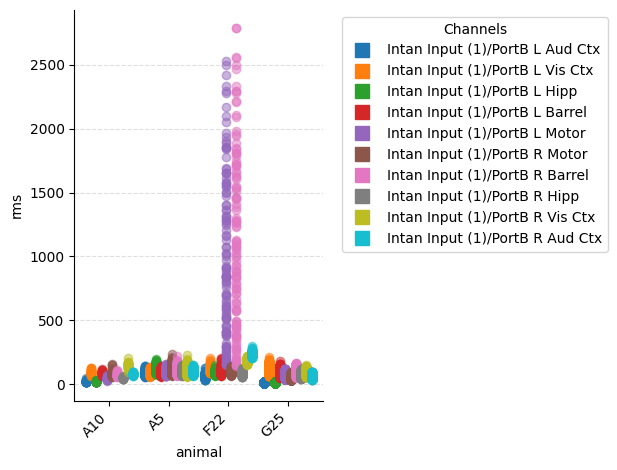

In [41]:
wars = []
animal_ids = ['A5', 'A10', 'F22', 'G25']
for animal_id in animal_ids:
    wars.append(visualization.WindowAnalysisResult.from_pickle_and_json(Path(f'./test-wars/{animal_id}').resolve()))
ep = visualization.ExperimentPlotter(wars)
ep.plot_boxplot('rms')
ep.plot_violin('rms')
ep.plot_scatter('rms')